# Spatially Enabled DataFrames - Advanced Topics
[guide](https://developers.arcgis.com/python/guide/spatially-enabled-dataframe-advanced-topics/)

The information in this section provides a brief introduction to advanced topics with the `Spatially Enabled DataFrame` structure.  

One of the most important tasks for software applications is to quickly retrieve and process information. Enterprise systems, whether storing GIS information or not, all utilize the concept of indexing to allow for quick searching through large data stores to locate and select specific information for subsequent processing. 

This document will outline how row and column indexing work in Spatially Enabled Dataframes and also demonstrate building a spatial index on dataframe geometries to allow for quick searching, accessing, and processing. The document will also demonstrate spatial joins to combine dataframes.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Spatially-Enabled-DataFrames---Advanced-Topics" data-toc-modified-id="Spatially-Enabled-DataFrames---Advanced-Topics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Spatially Enabled DataFrames - Advanced Topics</a></span><ul class="toc-item"><li><span><a href="#DataFrame-Index" data-toc-modified-id="DataFrame-Index-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>DataFrame Index</a></span></li><li><span><a href="#Describing-the-DataFrame" data-toc-modified-id="Describing-the-DataFrame-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Describing the DataFrame</a></span><ul class="toc-item"><li><span><a href="#Example:-Displaying-info-on-Spatially-Enabled-DataFrame-(SEDF)" data-toc-modified-id="Example:-Displaying-info-on-Spatially-Enabled-DataFrame-(SEDF)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Example: Displaying info on Spatially Enabled DataFrame (SEDF)</a></span></li><li><span><a href="#Slicing-DataFrames" data-toc-modified-id="Slicing-DataFrames-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Slicing DataFrames</a></span></li></ul></li><li><span><a href="#Spatial-Index" data-toc-modified-id="Spatial-Index-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Spatial Index</a></span></li><li><span><a href="#Intersection-with-the-Spatial-Index" data-toc-modified-id="Intersection-with-the-Spatial-Index-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Intersection with the Spatial Index</a></span></li><li><span><a href="#Spatial-Joins" data-toc-modified-id="Spatial-Joins-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Spatial Joins</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Example:-Merging-State-Statistics-Information-with-Cities" data-toc-modified-id="Example:-Merging-State-Statistics-Information-with-Cities-1.5.0.1"><span class="toc-item-num">1.5.0.1&nbsp;&nbsp;</span>Example: Merging State Statistics Information with Cities</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

## DataFrame Index
As mentioned in the [Introduction to the Spatially Enabled DataFrame guide](../introduction-to-the-spatially-enabled-dataframe), the Pandas [DataFrame structure](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) underlies the ArcGIS API for Python's Spatially Enabled DataFrame. Pandas DataFrames are analagous to spreadsheets. They have a row axis and a column axis. Each of these axes are indexed and labeled for quick and easy identification, data alignment, and retrieval and updating of data subsets.

Let's explore the axes labels and indices and how they allow for data exploraation:

In [1]:
from arcgis.gis import GIS
gis = GIS()

When working with an ArcGIS Online feature layer, the [`query()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.FeatureLayer.query) method returns a `FeatureSet` object which has a `sdf` method to instantiate a Spatially Enabled DataFrame.

In [4]:
item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
item

<Item title:"USA Major Cities" type:Feature Layer Collection owner:esri_dm>

In [5]:
flayer = item.layers[0]
df = flayer.query(where="AGE_45_54 < 1500").sdf
df.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
0,1,Ammon,city,ID,16,1601990,,6,15181,13816,...,1131,106,335,3352,3.61,4747,271,3205,1271,"{""x"": -12462673.723706165, ""y"": 5384674.994080..."
1,2,Blackfoot,city,ID,16,1607840,,6,11946,11899,...,1081,174,381,2958,3.31,4547,318,2788,1441,"{""x"": -12506251.313993266, ""y"": 5341537.793529..."
2,4,Burley,city,ID,16,1611260,,6,10727,10345,...,861,139,358,2499,3.37,3885,241,2183,1461,"{""x"": -12667411.402393516, ""y"": 5241722.820606..."
3,6,Chubbuck,city,ID,16,1614680,,6,14655,13922,...,1281,172,370,3586,3.4,4961,229,3324,1408,"{""x"": -12520053.904151963, ""y"": 5300220.333409..."
4,12,Jerome,city,ID,16,1641320,,6,11403,10890,...,779,210,385,2640,3.44,3985,292,2219,1474,"{""x"": -12747828.64784961, ""y"": 5269214.8197742..."


## Describing the DataFrame

The `DataFrame.info()` provides a concise summary of the object. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

### Example: Displaying info on Spatially Enabled DataFrame (SEDF)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 51 columns):
AGE_10_14     317 non-null int64
AGE_15_19     317 non-null int64
AGE_20_24     317 non-null int64
AGE_25_34     317 non-null int64
AGE_35_44     317 non-null int64
AGE_45_54     317 non-null int64
AGE_55_64     317 non-null int64
AGE_5_9       317 non-null int64
AGE_65_74     317 non-null int64
AGE_75_84     317 non-null int64
AGE_85_UP     317 non-null int64
AGE_UNDER5    317 non-null int64
AMERI_ES      317 non-null int64
ASIAN         317 non-null int64
AVE_FAM_SZ    317 non-null float64
AVE_HH_SZ     317 non-null float64
BLACK         317 non-null int64
CAPITAL       317 non-null object
CLASS         317 non-null object
FAMILIES      317 non-null int64
FEMALES       317 non-null int64
FHH_CHILD     317 non-null int64
FID           317 non-null int64
HAWN_PI       317 non-null int64
HISPANIC      317 non-null int64
HOUSEHOLDS    317 non-null int64
HSEHLD_1_F    317 non-null int6

We can see that the `SHAPE` column is of type `geometry`.  This means that compared to the legacy `SpatialDataFrame` class, geometry columns are now unique instead of being just of type `object`.

We can get information about each axis label (aka, `index`) with the `axes` property on the spatial dataframe.

In [4]:
print("{:<15}{}\n\n{}{}".format("Row axis: ", df.axes[0], "Column axis: ", df.axes[1]))

Row axis:      RangeIndex(start=0, stop=317, step=1)

Column axis: Index(['AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44',
       'AGE_45_54', 'AGE_55_64', 'AGE_5_9', 'AGE_65_74', 'AGE_75_84',
       'AGE_85_UP', 'AGE_UNDER5', 'AMERI_ES', 'ASIAN', 'AVE_FAM_SZ',
       'AVE_HH_SZ', 'BLACK', 'CAPITAL', 'CLASS', 'FAMILIES', 'FEMALES',
       'FHH_CHILD', 'FID', 'HAWN_PI', 'HISPANIC', 'HOUSEHOLDS', 'HSEHLD_1_F',
       'HSEHLD_1_M', 'HSE_UNITS', 'MALES', 'MARHH_CHD', 'MARHH_NO_C',
       'MED_AGE', 'MED_AGE_F', 'MED_AGE_M', 'MHH_CHILD', 'MULT_RACE', 'NAME',
       'OBJECTID', 'OTHER', 'OWNER_OCC', 'PLACEFIPS', 'POP2010', 'POPULATION',
       'POP_CLASS', 'RENTER_OCC', 'SHAPE', 'ST', 'STFIPS', 'VACANT', 'WHITE'],
      dtype='object')


Row axis information informs us we can retrieve information using the the dataframe [`loc`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html#pandas.DataFrame.loc) attribute and any value in the range 0-317 inclusive to access a row. Column axis information tells us we can use any string in the index to return an attribute column:

In [5]:
df.loc[0] #the first row returned

AGE_10_14                                                  1413
AGE_15_19                                                  1381
AGE_20_24                                                  1106
AGE_25_34                                                  2138
AGE_35_44                                                  1815
AGE_45_54                                                  1411
AGE_55_64                                                   979
AGE_5_9                                                    1557
AGE_65_74                                                   525
AGE_75_84                                                   307
AGE_85_UP                                                    93
AGE_UNDER5                                                 1562
AMERI_ES                                                    112
ASIAN                                                        55
AVE_FAM_SZ                                                 3.99
AVE_HH_SZ                               

In [6]:
df['POP2010'] #the data from the `POP2010` attribute column

0      14287
1       9932
2      10616
3      10866
4      12823
5      10755
6      10080
7      10334
8      10588
9      10648
10     11570
11     23096
12     13544
13     12874
14     16192
15     10802
16     11768
17     13058
18     12707
19     11014
20     10234
21      9675
22     10644
23     10224
24     14494
25     10471
26     10127
27     11211
28     11602
29     29589
       ...  
287    10687
288     9840
289    11545
290    13975
291    10465
292    42034
293    10372
294    10568
295    18461
296    10461
297     9845
298    14068
299    13816
300    11899
301    10345
302    13922
303    25484
304    10494
305     9577
306    10615
307    10600
308    11070
309    13431
310    10060
311    10869
312    10125
313    11196
314    10697
315    12764
316    10571
Name: POP2010, Length: 317, dtype: int64

### Slicing DataFrames
We can access rows, columns and subsets of rows and columns using Python slicing:

In [7]:
#rows 0-9 with a subset of columns indexed as a list
df.loc[0:9][['OBJECTID', 'NAME', 'ST', 'POP2010', 'POPULATION']]

,OBJECTID,NAME,ST,POP2010,POPULATION
0,6,Somerton,AZ,14287,14980
1,20,Anderson,CA,9932,10239
2,67,Camp Pendleton South,CA,10616,11869
3,85,Citrus,CA,10866,11195
4,94,Commerce,CA,12823,13009
5,113,Delhi,CA,10755,11336
6,139,Emeryville,CA,10080,11010
7,143,Exeter,CA,10334,10642
8,148,Farmersville,CA,10588,10768
9,164,Garden Acres,CA,10648,10708


We can use indexing to access `SHAPE` information and draw it on a map:

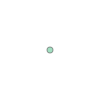

In [17]:
camp_pendleton_s_geodefn = df.loc[2]['SHAPE'] #geometry definition from row 2
camp_pendleton_s_geodefn

In [19]:
m = gis.map("San Diego, CA", 8)
m

MapView(layout=Layout(height='400px', width='100%'))

![Camp Pendleton_South_pt](../../static/img/cps_pt_draw.png)

In [20]:
m.draw(camp_pendleton_s_geodefn)

## Spatial Index
In addition to row and column indices to search a DataFrame, we can use a spatial indexes to quickly access information based on its location and relationship with other features. They are based on the concept of a **minimum bounding rectangle** - the smallest rectangle that contains an entire geometric shape. Each of these rectangles are then grouped into `leaf` nodes representing a single shape and `node` structures containing groups of shapes according to whatever algorithm the different types of spatial indexing use. Querying these rectangles requires magnitudes fewer compute resources for accessing and processing geometries relative to accessing the entire feature array of coordinate pairs that compose a shape. Access to points, complex lines and irregularly-shaped polygons becomes much quicker and easier through different flavors of spatial indexing.

The Spatially Enabled DataFrame uses an implementation of spatial indexing known as [QuadTree indexing](https://en.wikipedia.org/wiki/Quadtree), which searches nodes when determining locations, relationships and attributes of specific features. `QuadTree` indexes are the default spatial index, but the SEDF also supports `r-tree` implementations.  In the [**DataFrame Index**](#DataFrame-index) section of this notebook, the USA Major Cities feature layer was queried and the `sdf` property was called on the results to create a DataFrame. The [`sindex`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.GeoAccessor.sindex) method on the DataFrame creates a QuadTree index:

In [31]:
si = df.spatial.sindex('quadtree',reset=False)

Let's visually inspect the external frame of the QuadTree index. We'll then plot the spatial dataframe to ensure the spatial index encompasses all our features:

In [6]:
midx = gis.map("United States", 3)
midx

MapView(layout=Layout(height='400px', width='100%'))

In [9]:
midx1 = gis.map()
midx1.basemaps

['dark-gray-vector',
 'gray-vector',
 'hybrid',
 'oceans',
 'osm',
 'satellite',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo-vector',
 'arcgis-imagery',
 'arcgis-imagery-standard',
 'arcgis-imagery-labels',
 'arcgis-light-gray',
 'arcgis-dark-gray',
 'arcgis-navigation',
 'arcgis-navigation-night',
 'arcgis-streets',
 'arcgis-streets-night',
 'arcgis-streets-relief',
 'arcgis-topographic',
 'arcgis-oceans',
 'osm-standard',
 'osm-standard-relief',
 'osm-streets',
 'osm-streets-relief',
 'osm-light-gray',
 'osm-dark-gray',
 'arcgis-terrain',
 'arcgis-community',
 'arcgis-charted-territory',
 'arcgis-colored-pencil',
 'arcgis-nova',
 'arcgis-modern-antique',
 'arcgis-midcentury',
 'arcgis-newspaper',
 'arcgis-hillshade-light',
 'arcgis-hillshade-dark',
 'arcgis-human-geography',
 'arcgis-human-geography-dark']

![Spatial Index Envelope](../../static/img/sindex_draw.png)

In [12]:
midx.center = [39, -98]
midx.basemap = 'dark-gray-vector'

In [13]:
df.spatial.plot(map_widget=midx)

True

Let's use the feature we drew earlier to define a spatial reference variable for use throughout the rest of this guide.

In [29]:
type(df)

pandas.core.frame.DataFrame

In [21]:
sp_ref = camp_pendleton_s_geodefn['spatialReference']
sp_ref

{'wkid': 102100, 'latestWkid': 3857}

In [33]:
import time
from arcgis.geometry import Geometry, Polygon

#define a symbol to visualize the spatial index quadrants
sym = {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [0,0,0,0],
    "outline": {
        "type": "esriSLS",
        "style": "esriSLSSolid",
        "color": [0,0,0,255],
        "width": 4}
}

# loop through the children of the root index and draw each extent
# using a different outline color
for i in range(len(si._index.children)):
    sym["outline"]["color"][i] = 255
    if i > 0:
        sym["outline"]["color"][i] = 255
        sym["outline"]["color"][i-1] = 0
    child = si._index.children[i]
    width_factor = child.width/2
    height_factor = child.width/2
    minx = child.center[0] - width_factor
    miny = child.center[1] - height_factor
    maxx = child.center[0] + width_factor
    maxy = child.center[1] + height_factor
    child_geom = Geometry({
        'rings':[[[minx,miny], [minx, maxy], [maxx, maxy], [maxx, miny], [minx, miny]]],
        'spatialReference': sp_ref})
    #child_extent = Polygon(child_geom)
    midx.draw(shape = child_geom, symbol = sym)
    time.sleep(2)

## Intersection with the Spatial Index

Up to this point in this guide, we've talked about using indexing for querying attributes in the dataframe. For example:

In [34]:
query = df['ST'] == 'MI'
df[query]

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
101,1514,Allendale,Census Designated Place,MI,26,2601340,,6,19709,17579,...,939,94,200,2639,3.26,4834,227,2511,2096,"{""x"": -9568014.259185659, ""y"": 5309698.1042234..."
102,1523,Big Rapids,city,MI,26,2608300,,6,10614,10601,...,436,82,322,1323,2.88,3623,293,1136,2194,"{""x"": -9515614.1943842, ""y"": 5419013.554990504..."
103,1526,Cadillac,city,MI,26,2612320,,6,10547,10355,...,999,179,526,2625,2.9,4927,647,2519,1761,"{""x"": -9508449.13740055, ""y"": 5504118.53341087..."
104,1528,Coldwater,city,MI,26,2617020,,6,10828,10945,...,897,213,445,2628,3.14,4827,572,2576,1679,"{""x"": -9462596.578807637, ""y"": 5152066.1922501..."
105,1529,Comstock Park,Census Designated Place,MI,26,2617700,,6,10892,10088,...,920,167,557,2639,2.96,4656,484,1979,2193,"{""x"": -9537405.970997674, ""y"": 5316589.2811759..."
106,1538,Farmington,city,MI,26,2627380,,6,10674,10372,...,1129,66,287,2735,2.92,4959,335,2876,1748,"{""x"": -9281637.643149175, ""y"": 5230343.3917462..."
107,1546,Grand Haven,city,MI,26,2633340,,6,11073,10412,...,1277,115,320,2721,2.82,5815,1046,3239,1530,"{""x"": -9597693.318165638, ""y"": 5320625.9222716..."
108,1575,Muskegon Heights,city,MI,26,2656360,,6,10657,10856,...,460,143,1183,2682,3.23,4842,846,2042,1954,"{""x"": -9600424.098598039, ""y"": 5342825.5598096..."
109,1600,Sturgis,city,MI,26,2676960,,6,10944,10994,...,835,195,467,2632,3.28,4595,507,2333,1755,"{""x"": -9508726.380150843, ""y"": 5131255.7167436..."


We can query multiple attributes and filter on the column output as well:

In [35]:
query = (df['POP2010'] > 20000) & (df['ST'] == 'OH')
df[query][['NAME','ST','POP2010','HOUSEHOLDS','HSEHLD_1_F', 'HSEHLD_1_M']]

,NAME,ST,POP2010,HOUSEHOLDS,HSEHLD_1_F,HSEHLD_1_M
166,Athens,OH,23832,6903,2474,2573
195,Oxford,OH,21371,5799,2033,1850


As GIS analysts and data scientists, we also want to query based on geographic location. We can do that by building a spatial index with the `sindex` property of the spatial dataframe. The resulting quadtree index allows us to query based on specific geometries in relation to other geometries. 

Let's continue looking at the dataframe wer're working with: US cities with a population between the ages of 45 and 54 of less than 1500. 

We can draw the entire extent of our dataframe using the dataframe's [`geoextent`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.SpatialDataFrame.geoextent) property. Let's get the bounding box coordinates:

In [36]:
df_geoextent = df.spatial.full_extent
df_geoextent

(-17595352.55942164,
 2429395.3372018305,
 -7895099.852443745,
 6266417.1716177985)

Let's use these coordinates, place them in more descriptive variable names, then create a bounding box to make a geometry object representing the extent of our dataframe. Finally we'll draw it on the a map:

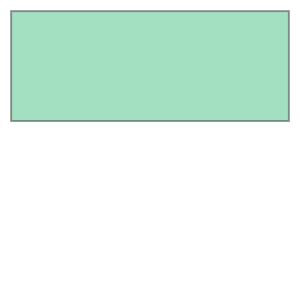

In [37]:
df_geoextent_geom = df.spatial.bbox
df_geoextent_geom

In [38]:
m1 = gis.map("United States", 3)
m1

MapView(layout=Layout(height='400px', width='100%'))

![Dataframe Extent with AOI](../../static/img/df_extent_aoi.png)

In [49]:
m1.center = [39, -98]
m1.zoom = 10

In [50]:
sym_poly = {
  "type": "esriSFS",
  "style": "esriSFSSolid",
  "color": [0,0,0,0],  # hollow, no fill
    "outline": {
     "type": "esriSLS",
     "style": "esriSLSSolid",
     "color": [255,0,0,255],  # red border
     "width": 3}
}

m1.draw(shape = df_geoextent_geom, symbol = sym_poly)

Now, let's define a second set of coordinates representing a bounding box for which we want to query the features from our dataframe that fall within it.

We can define our list of coordinates, and then draw it on the map to make sure it falls within our dataframe extent:

In [65]:
area_of_interest = [-13043219.122301877, 3911134.034258818, -13243219.102301877, 4111134.0542588173]
minx, miny, maxx, maxy = area_of_interest[0], area_of_interest[1], area_of_interest[2], area_of_interest[3]

area_of_interest_ring = [[[minx, miny], [minx, maxy], [maxx, maxy], [maxx, miny], [minx, miny]]]
area_of_interest_geom = Geometry({'rings': area_of_interest_ring, 'spatialReference': sp_ref})

sym_poly_aoi = {
  "type": "esriSFS",
  "style": "esriSFSSolid",
  "color": [0,0,0,0],  # hollow, no fill
    "outline": {
     "type": "esriSLS",
     "style": "esriSLSSolid",
     "color": [0,255,0,255],   # green border
     "width": 3}
}

m1.draw(shape = area_of_interest_geom, symbol = sym_poly_aoi)

We can see that our area of interest box falls within the dataframe extent.  The spatial index has an `intersect` method which takes a bounding box as input and returns a list of integer values from the row index of our spatial dataframe. We can use the dataframe's [`iloc`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc) integer-indexing attribute to then loop through the dataframe and put draw the features on a map

In [66]:
index_of_features = si.intersect(area_of_interest)

In [74]:
index_of_features

[32, 69, 70, 71, 77, 81]

In [67]:
df.iloc[index_of_features]

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
32,454,Muscoy,Census Designated Place,CA,06,0650132,,6,11161,10644,...,302,194,308,1933,4.76,2443,212,1268,963,"{""x"": -13063141.654215325, ""y"": 4049605.974486..."
69,1035,Camp Pendleton South,Census Designated Place,CA,06,0610561,,6,10450,10616,...,389,37,169,2500,3.69,2865,296,11,2558,"{""x"": -13066535.250599463, ""y"": 3925680.810605..."
70,1053,Citrus,Census Designated Place,CA,06,0613560,,6,11329,10866,...,541,116,255,2195,4.33,2701,86,1854,761,"{""x"": -13123874.444099307, ""y"": 4044252.329385..."
71,1062,Commerce,city,CA,06,0614974,,6,13227,12823,...,549,169,424,2709,4.17,3470,88,1619,1763,"{""x"": -13151212.145498956, ""y"": 4027601.902958..."
77,1158,Home Gardens,Census Designated Place,CA,06,0634302,,6,12223,11570,...,573,135,298,2336,4.35,2865,105,1952,808,"{""x"": -13080593.064290542, ""y"": 4012558.291540..."
81,1177,Laguna Woods,city,CA,06,0639259,,6,17960,16192,...,3264,6,15,3873,2.07,13016,1714,8730,2572,"{""x"": -13105613.458129246, ""y"": 3976538.093303..."


Let us plot these features that intersect on a map:

In [68]:
m2 = gis.map("Los Angeles, CA", 7)
m2

MapView(layout=Layout(height='400px', width='100%'))

![Area_of_interest_intersect](../../static/img/si_intersect.png)

In [70]:
m2.center = [34, -118]

In [71]:
m2.draw(shape = area_of_interest_geom, symbol = sym_poly_aoi)

In [72]:
pt_sym = {
    "type": "esriSMS",
    "style": "esriSMSDiamond",
    "color": [255,140,0,255],  # yellowish
    "size": 8,
    "angle": 0,
    "xoffset": 0,
    "yoffset": 0,
    "outline": {
        "color": [255,140,0,255],
        "width": 1}
 }
        
for pt_index in index_of_features:
    m2.draw(shape = df.iloc[pt_index]['SHAPE'], symbol = pt_sym)  

Thus we were able to use the spatial indexes to query features that fall within an extent.

## Spatial Joins
DataFrames are table-like structures comprised of rows and columns. In relational database, SQL `joins` are fundamental operations that combine columns from one or more tables using values that are common to each. They occur in almost all database queries.

A Spatial join is a table operation that affixes data from one feature layer’s attribute table to another based on a spatial relationship. The spatial join involves matching rows from the Join Features (data frame1) to the Target Features (data frame2) based on their spatial relationship.

Let's look at how joins work with dataframes by using subsets of our original DataFrame and the pandas `merge` fucntionality. We'll then move onto examining a spatial join to combine features from one dataframe with another based on a common attribute value.

Query the DataFrame to extract 3 attribute columns of information from 2 states, Ohio and Michigan:

In [75]:
query = (df['ST'] == 'OH') | (df['ST'] == 'MI')
df1 = df[query][['NAME', 'ST', 'POP2010']]
df1

,NAME,ST,POP2010
101,Allendale,MI,17579
102,Big Rapids,MI,10601
103,Cadillac,MI,10355
104,Coldwater,MI,10945
105,Comstock Park,MI,10088
106,Farmington,MI,10372
107,Grand Haven,MI,10412
108,Muskegon Heights,MI,10856
109,Sturgis,MI,10994
166,Athens,OH,23832


Query the dataframe again for 8 attribute columns from one state, Ohio

In [76]:
query = df['ST'] == 'OH'
df2 = df[query][['NAME', 'POPULATION','BLACK', 'HAWN_PI', 'HISPANIC', 'WHITE', 'MULT_RACE', 'OTHER']]
df2

,NAME,POPULATION,BLACK,HAWN_PI,HISPANIC,WHITE,MULT_RACE,OTHER
166,Athens,25431,1047,10,576,20586,559,138
167,Cambridge,10541,361,3,129,9857,316,33
168,Celina,10566,50,41,293,9873,164,111
192,Galion,10385,50,1,140,10264,120,42
193,London,10543,596,0,169,8830,287,61
194,Northbrook,10825,2974,6,377,6995,379,141
195,Oxford,23054,859,2,491,18719,478,127
196,Springdale,11507,3355,44,1965,6169,331,977
197,Trenton,12393,115,2,198,11418,224,35
198,University Heights,13884,3133,4,374,9726,215,121


The Pandas [`merge`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) capability joins dataframes in a style similar to SQL joins, with parameters to indicate the column of shared information and the type of join to perform:

An `inner` join (the default), is analagous to a SQL left inner join, keeping the order from the left table in the output and returning only those records from the right table that match the value in the column specified with the `on` parameter:

In [ ]:
import pandas as pd

In [81]:
df1_df2_inner = pd.merge(df1, df2, on='NAME', how='inner')
df1_df2_inner

,NAME,ST,POP2010,POPULATION,BLACK,HAWN_PI,HISPANIC,WHITE,MULT_RACE,OTHER
0,Athens,OH,23832,25431,1047,10,576,20586,559,138
1,Cambridge,OH,10635,10541,361,3,129,9857,316,33
2,Celina,OH,10400,10566,50,41,293,9873,164,111
3,Galion,OH,10512,10385,50,1,140,10264,120,42
4,London,OH,9904,10543,596,0,169,8830,287,61
5,Northbrook,OH,10668,10825,2974,6,377,6995,379,141
6,Oxford,OH,21371,23054,859,2,491,18719,478,127
7,Springdale,OH,11223,11507,3355,44,1965,6169,331,977
8,Trenton,OH,11869,12393,115,2,198,11418,224,35
9,University Heights,OH,13539,13884,3133,4,374,9726,215,121


In [155]:
print(df1_df2_inner.shape[0], "features")
map_inner = gis.map("USA")
query2 = df['NAME'] = df1_df2_inner['NAME']
filtered_df = df[df['NAME'].isin(query2)]
#map_inner.draw(shape=filtered_df.SHAPE)
for idx, row in filtered_df.iterrows():
    map_inner.draw(row['SHAPE'])
map_inner

11 features


MapView(layout=Layout(height='400px', width='100%'))

Notice how all the rows from the left `DataFrame` appear in the result with all the attribute columns and values appended from the right `DataFrame` where the column value of `NAME` matched. The `POP2010` attribute from the left `DataFrame` is combined with all the attributes from the right `DataFrame`.

An `outer` join combines all rows from both outputs together and orders the results according to the original row index:

In [154]:
df1_df2_outer = pd.merge(df1, df2, on='NAME', how = 'outer')
print(df1_df2_outer.shape)
df1_df2_outer.head(3)

(20, 10)


,NAME,ST,POP2010,POPULATION,BLACK,HAWN_PI,HISPANIC,WHITE,MULT_RACE,OTHER
0,Allendale,MI,17579,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,Big Rapids,MI,10601,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,Cadillac,MI,10355,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [156]:
print(df1_df2_outer.shape[0], "features")
map_outer = gis.map("USA")
query_outer = df['NAME'] = df1_df2_outer['NAME']
filtered_outer_df = df[df['NAME'].isin(query_outer)]
#map_inner.draw(shape=filtered_df.SHAPE)
for idx, row in filtered_outer_df.iterrows():
    map_outer.draw(row['SHAPE'])
map_outer

20 features


MapView(layout=Layout(height='400px', width='100%'))

The rows where the on parameter value is the same in both tables have all attributes from both DataFrames in the result. The rows from the first DataFrame that do not have a matching `NAME` value in the second dataframe have values filled in with `NaN` values.

A spatial join works similarly on matching attribute values. However, instead of joining on an attribue field (like you did earlier), you will join based on the spatial relationship between the records in the two tables.

#### Example: Merging State Statistics Information with Cities

The goal is to get Wyoming's city locations and census data joined with Wyoming's state census data.
> If you do not have access to the `ArcPy` site-package from the Python interpreter used to execute the following cells, you must authenticate to an ArcGIS Online Organization or ArcGIS Enterprise portal.

In [159]:
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import os

In [160]:
path = os.getcwd()
data_path = "data"
data_path = os.path.join(path[:path.find("TemasExamen_ApiforPython")], "TemasExamen_ApiforPython", data_path)
data_path

'D:\\EsriTraining\\APIforPython\\TemasExamen_ApiforPython\\data'

In [37]:
#g2 = GIS("https://pythonapi.playground.esri.com/portal", "arcgis_python", "amazing_arcgis_123")

In [172]:
data_pth = data_path
cities = "cities.shp"
states = "states.shp"

In [ ]:
sdf_target = pd.DataFrame.spatial.from_featureclass(os.path.join(data_pth, cities))
sdf_join = pd.DataFrame.spatial.from_featureclass(os.path.join(data_pth, states))
sdf_target

We will use python's list comprehensions to create lists of the attribute columns in the DataFrame, then print out the lists to see the names of all the attribute columns.

In [40]:
sdf_target_cols = [column for column in sdf_target.columns]
sdf_join_cols = [column for column in sdf_join.columns]

Print out a list of columns in the `sdf_target` dataframe created from the cities shapefile:

In [41]:
for a,b,c,d in zip(sdf_target_cols[::4],sdf_target_cols[1::4],sdf_target_cols[2::4], sdf_target_cols[3::4]):
    print("{:<30}{:<30}{:<30}{:<}".format(a,b,c,d))

FID                           NAME                          CLASS                         ST
STFIPS                        PLACEFIP                      CAPITAL                       AREALAND
AREAWATER                     POP_CLASS                     POP2000                       POP2007
WHITE                         BLACK                         AMERI_ES                      ASIAN
HAWN_PI                       OTHER                         MULT_RACE                     HISPANIC
MALES                         FEMALES                       AGE_UNDER5                    AGE_5_17
AGE_18_21                     AGE_22_29                     AGE_30_39                     AGE_40_49
AGE_50_64                     AGE_65_UP                     MED_AGE                       MED_AGE_M
MED_AGE_F                     HOUSEHOLDS                    AVE_HH_SZ                     HSEHLD_1_M
HSEHLD_1_F                    MARHH_CHD                     MARHH_NO_C                    MHH_CHILD
FHH_CHILD      

Print out a list of columns in the `sdf_join` dataframe created from the states shapefile:

In [42]:
for a,b,c,d,e in zip(sdf_join_cols[::5],sdf_join_cols[1::5],sdf_join_cols[2::5],sdf_join_cols[3::5],sdf_join_cols[4::5]):
    print("{:<20}{:<20}{:<20}{:<20}{:<}".format(a,b,c,d,e))

FID                 STATE_NAME          STATE_FIPS          SUB_REGION          STATE_ABBR
POPULATION          POP_SQMI            POP2010             POP10_SQMI          WHITE
BLACK               AMERI_ES            ASIAN               HAWN_PI             HISPANIC
OTHER               MULT_RACE           MALES               FEMALES             AGE_UNDER5
AGE_5_9             AGE_10_14           AGE_15_19           AGE_20_24           AGE_25_34
AGE_35_44           AGE_45_54           AGE_55_64           AGE_65_74           AGE_75_84
AGE_85_UP           MED_AGE             MED_AGE_M           MED_AGE_F           HOUSEHOLDS
AVE_HH_SZ           HSEHLD_1_M          HSEHLD_1_F          MARHH_CHD           MARHH_NO_C
MHH_CHILD           FHH_CHILD           FAMILIES            AVE_FAM_SZ          HSE_UNITS
VACANT              OWNER_OCC           RENTER_OCC          NO_FARMS12          AVE_SIZE12
CROP_ACR12          AVE_SALE12          SQMI                Shape_Leng          Shape_Area


Create a DataFrame for the cities in Wyoming:

In [43]:
sdf_target.loc[0]['SHAPE']

{'x': -147.8271911572905,
 'y': 64.84830019415946,
 'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}

In [44]:
q = sdf_target['ST'] == 'WY'
left = sdf_target[q].copy()
left.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIP,CAPITAL,AREALAND,AREAWATER,POP_CLASS,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
711,711,Green River,City,WY,56,33740,,13.706,0.315,6,...,1278,113,251,3214,3.22,4426,249,3169,1008,"{""x"": -109.46492712301152, ""y"": 41.51419117328..."
712,712,Rock Springs,City,WY,56,67235,,18.441,0.000,6,...,2012,220,536,4931,3.02,8359,1011,5274,2074,"{""x"": -109.22240010498797, ""y"": 41.59092714080..."
715,715,Evanston,City,WY,56,25620,,10.245,0.044,6,...,976,139,369,2940,3.30,4665,607,2805,1253,"{""x"": -110.96461812552366, ""y"": 41.26330015271..."
764,764,Laramie,City,WY,56,45050,,11.138,0.019,6,...,2496,174,587,5608,2.83,11994,658,5379,5957,"{""x"": -105.58725462620347, ""y"": 41.31292665660..."
766,766,Cheyenne,City,WY,56,13900,State,21.108,0.082,7,...,6299,490,1610,14174,2.93,23782,1458,14739,7585,"{""x"": -104.80204559586696, ""y"": 41.14554516058..."


Create a dataframe for the state of Wyoming:

In [45]:
q = sdf_join.STATE_ABBR == 'WY'
right = sdf_join[q].copy()
right.head()

,FID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,POPULATION,POP_SQMI,POP2010,POP10_SQMI,WHITE,...,OWNER_OCC,RENTER_OCC,NO_FARMS12,AVE_SIZE12,CROP_ACR12,AVE_SALE12,SQMI,Shape_Leng,Shape_Area,SHAPE
10,10,Wyoming,56,Mountain,WY,587106,6.0,563626,5.8,511279,...,157077,69802,11736.0,2587.0,2418931.0,143952.0,97813.89,21.98703,27.966688,"{""rings"": [[[-104.05361521909884, 41.698218275..."


Perform the spatial join:

In [46]:
sdf2 = left.spatial.join(right)
sdf2

,FID_left,NAME,CLASS,ST,STFIPS,PLACEFIP,CAPITAL,AREALAND,AREAWATER,POP_CLASS,...,VACANT_right,OWNER_OCC_right,RENTER_OCC_right,NO_FARMS12,AVE_SIZE12,CROP_ACR12,AVE_SALE12,SQMI,Shape_Leng,Shape_Area
0,711,Green River,City,WY,56,33740,,13.706,0.315,6,...,34989,157077,69802,11736.0,2587.0,2418931.0,143952.0,97813.89,21.98703,27.966688
1,712,Rock Springs,City,WY,56,67235,,18.441,0.000,6,...,34989,157077,69802,11736.0,2587.0,2418931.0,143952.0,97813.89,21.98703,27.966688
2,715,Evanston,City,WY,56,25620,,10.245,0.044,6,...,34989,157077,69802,11736.0,2587.0,2418931.0,143952.0,97813.89,21.98703,27.966688
3,764,Laramie,City,WY,56,45050,,11.138,0.019,6,...,34989,157077,69802,11736.0,2587.0,2418931.0,143952.0,97813.89,21.98703,27.966688
4,766,Cheyenne,City,WY,56,13900,State,21.108,0.082,7,...,34989,157077,69802,11736.0,2587.0,2418931.0,143952.0,97813.89,21.98703,27.966688
5,1216,Sheridan,City,WY,56,69845,,8.486,0.018,6,...,34989,157077,69802,11736.0,2587.0,2418931.0,143952.0,97813.89,21.98703,27.966688
6,1218,Casper,City,WY,56,13150,,23.945,0.316,6,...,34989,157077,69802,11736.0,2587.0,2418931.0,143952.0,97813.89,21.98703,27.966688
7,1219,Gillette,City,WY,56,31855,,13.369,0.025,6,...,34989,157077,69802,11736.0,2587.0,2418931.0,143952.0,97813.89,21.98703,27.966688


Notice, you retain the geometry type of your left DataFrame (points) in this case, however, you get all the attributes from both the left and right DataFrames. Let us plot the results of the spatial join on a map:

In [47]:
m3 = gis.map("Wyoming", 6)
m3

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

![Wyoming Spatial Join](../../static/img/sdf_join_wy.png)

In [48]:
m3.center = [43, -107]

In [49]:
from arcgis.geometry import Geometry

for idx, row in sdf2.iterrows():
    m3.draw(row['SHAPE'], symbol=pt_sym)

## Conclusion
Spatially Enabled DataFrame give you powerful data analysis and data wrangling capabilities. In addition to performing sql like operations on attribute data, you can perform geographic queries. This guide demonstrated some of these advanced capabilities of the SEDF.